# Comparing the relation of Life Expectancy and GDP of a country
This dataset was taken from WHO and World Bank to compare the GDP and Life expectancy of six countries.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
all_data = pd.read_csv("all_data.csv")
print(all_data)

## Categorize Data By Country
chile_data = all_data[(all_data.Country == 'Chile')]
china_data = all_data[(all_data.Country == 'China')]
germany_data = all_data[(all_data.Country == 'Germany')]
mexico_data = all_data[(all_data.Country == 'Mexico')]
usa_data = all_data[(all_data.Country == 'United States of America')]
zimbabwe_data = all_data[(all_data.Country == 'Zimbabwe')]


     Country  Year  Life expectancy           GDP
0      Chile  2000             77.3  7.786093e+10
1      Chile  2001             77.3  7.097992e+10
2      Chile  2002             77.8  6.973681e+10
3      Chile  2003             77.9  7.564346e+10
4      Chile  2004             78.0  9.921039e+10
..       ...   ...              ...           ...
91  Zimbabwe  2011             54.9  1.209845e+10
92  Zimbabwe  2012             56.6  1.424249e+10
93  Zimbabwe  2013             58.0  1.545177e+10
94  Zimbabwe  2014             59.2  1.589105e+10
95  Zimbabwe  2015             60.7  1.630467e+10

[96 rows x 4 columns]


# How as life expectancy changed over time in the six nations?

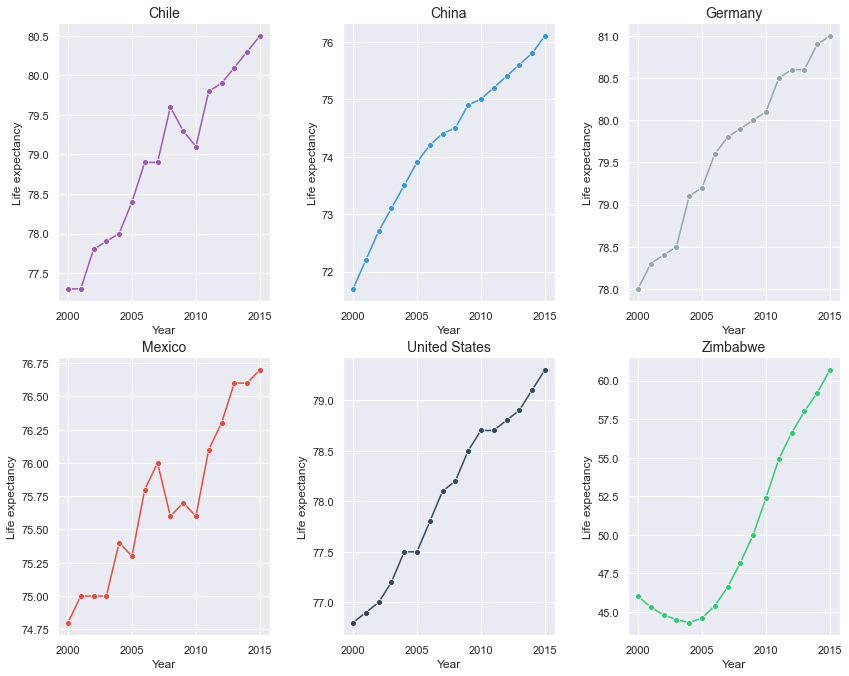

In [114]:
# Set Default Aesthetics
sns.set()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
chile_color, china_color, germany_color, mexico_color, usa_color, zimbabwe_color= sns.color_palette()[:6]

# Define Figure Size
plt.figure(figsize=(14, 10))

# Create the plots for each country
## Chile
ax1 = plt.subplot(2, 3, 1)
sns.lineplot(data= chile_data, x='Year', y='Life expectancy', marker='o', color=chile_color)
plt.title('Chile', fontsize=14)
## China
ax2 = plt.subplot(2, 3, 2)
sns.lineplot(data= china_data, x='Year', y='Life expectancy', marker='o', color=china_color)
plt.title('China', fontsize=14)
## Germany
ax3 = plt.subplot(2, 3, 3)
sns.lineplot(data= germany_data, x='Year', y='Life expectancy', marker='o', color=germany_color)
plt.title('Germany', fontsize=14)
## Mexico
ax4 = plt.subplot(2, 3, 4)
sns.lineplot(data= mexico_data, x='Year', y='Life expectancy', marker='o', color=mexico_color)
plt.title('Mexico', fontsize=14)
## USA
ax5 = plt.subplot(2, 3, 5)
sns.lineplot(data= usa_data, x='Year', y='Life expectancy', marker='o', color=usa_color)
plt.title('United States', fontsize=14)
## Zimbabwe
ax6 = plt.subplot(2, 3, 6)
sns.lineplot(data= zimbabwe_data, x='Year', y='Life expectancy', marker='o', color=zimbabwe_color)
plt.title('Zimbabwe', fontsize=14)

plt.subplots_adjust(wspace=0.35, bottom=0.03)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Life expectancy'>

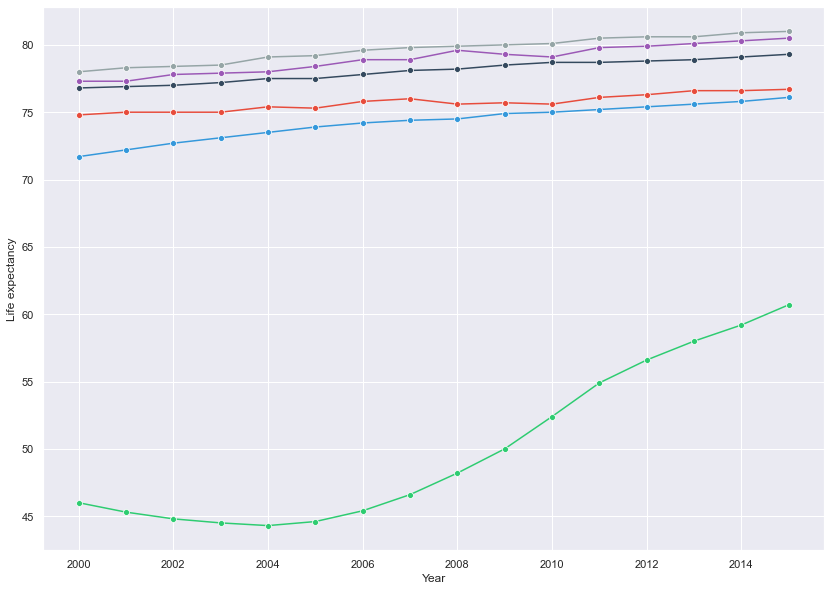

In [117]:
# Compare all Countries
## Define figure size Layout
plt.figure(figsize=(14, 10))

sns.lineplot(data= chile_data, x='Year', y='Life expectancy', marker='o', color=chile_color)
sns.lineplot(data= china_data, x='Year', y='Life expectancy', marker='o', color=china_color)
sns.lineplot(data= germany_data, x='Year', y='Life expectancy', marker='o', color=germany_color)
sns.lineplot(data= mexico_data, x='Year', y='Life expectancy', marker='o', color=mexico_color)
sns.lineplot(data= usa_data, x='Year', y='Life expectancy', marker='o', color=usa_color)
sns.lineplot(data= zimbabwe_data, x='Year', y='Life expectancy', marker='o', color=zimbabwe_color)

# How has GDP changed overtime for the last 6 countries?

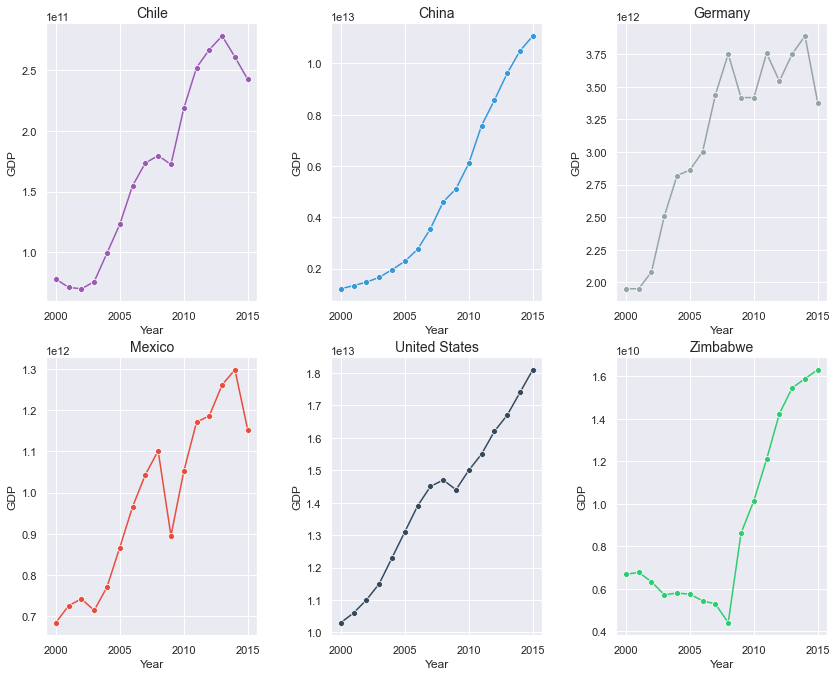

In [103]:
# Define figure size Layout
plt.figure(figsize=(14, 10))

# Create the plots for each country
## Chile
ax1 = plt.subplot(2, 3, 1)
sns.lineplot(data= chile_data, x='Year', y='GDP', marker='o', color=chile_color)
plt.title('Chile', fontsize=14)
## China
ax2 = plt.subplot(2, 3, 2)
sns.lineplot(data= china_data, x='Year', y='GDP', marker='o', color=china_color)
plt.title('China', fontsize=14)
## Germany
ax3 = plt.subplot(2, 3, 3)
sns.lineplot(data= germany_data, x='Year', y='GDP', marker='o', color=germany_color)
plt.title('Germany', fontsize=14)
## Mexico
ax4 = plt.subplot(2, 3, 4)
sns.lineplot(data= mexico_data, x='Year', y='GDP', marker='o', color=mexico_color)
plt.title('Mexico', fontsize=14)
## USA
ax5 = plt.subplot(2, 3, 5)
sns.lineplot(data= usa_data, x='Year', y='GDP', marker='o', color=usa_color)
plt.title('United States', fontsize=14)
## Zimbabwe
ax6 = plt.subplot(2, 3, 6)
sns.lineplot(data= zimbabwe_data, x='Year', y='GDP', marker='o', color=zimbabwe_color)
plt.title('Zimbabwe', fontsize=14)

plt.subplots_adjust(wspace=0.35, bottom=0.03)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='GDP'>

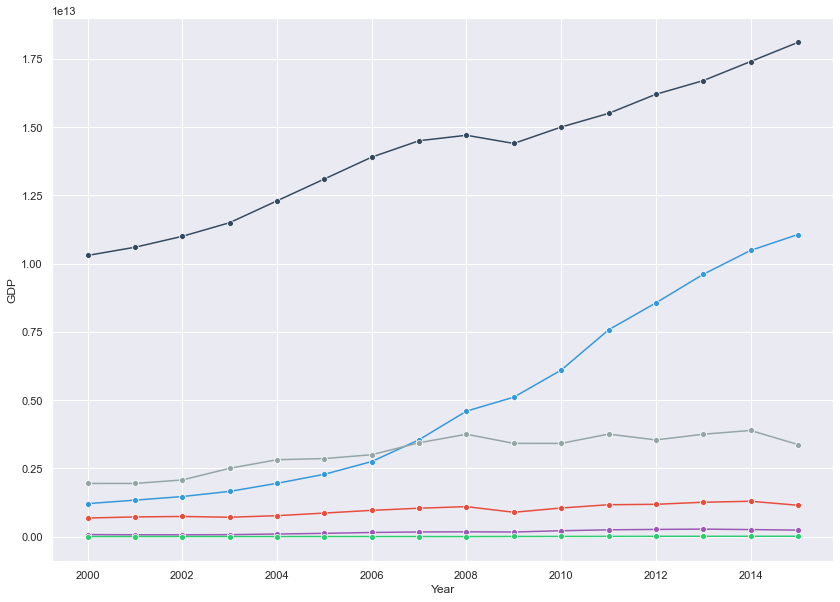

In [118]:
# Compare all Countries
## Define figure size Layout
plt.figure(figsize=(14, 10))

sns.lineplot(data= chile_data, x='Year', y='GDP', marker='o', color=chile_color)
sns.lineplot(data= china_data, x='Year', y='GDP', marker='o', color=china_color)
sns.lineplot(data= germany_data, x='Year', y='GDP', marker='o', color=germany_color)
sns.lineplot(data= mexico_data, x='Year', y='GDP', marker='o', color=mexico_color)
sns.lineplot(data= usa_data, x='Year', y='GDP', marker='o', color=usa_color)
sns.lineplot(data= zimbabwe_data, x='Year', y='GDP', marker='o', color=zimbabwe_color)